# <span style="color:green">  Numerical exercises 1</span>

## <span style="color:black"> Exercise 1.1 </span>

### <span style="color:black"> Part 1 </span>

Our task was testing the pseudo-random generator, for doing that we made an estimation of $\langle r \rangle = \int_0^1 r dr $ whose result is $ \frac{1}{2} $. The followed process for averaging is the blocking method.

The implementation of blocking method was made with use of a c++ class, the idea was having the possibility to make use of this class easily in another code. The class has to take in input the number of throws $M$, the number of blocks $N$ and consequently evaluates $L=\frac{M}{N}$. At this point there are two different way to use the class: 

- in the first one the classe accepts a vector of type double containing all $M$ datas after that evaluates the $N$ averages and in the end runs blocking methods
- in the second one the calculus of averages lies outside the class and then the class recives the average's vector double  and runs blocking methods

in this exercise both this way has been used.

In this case the estimated value $\langle r \rangle$ was obtained as average over (pseudo-)random generated number in $[0,1)$ and the uncertainty as standard deviation of the mean. I chose $\ M=10^5 $ and $\ N=100 $. Below it is possible to see the picture of the estimation, where  I've plotted $\langle r \rangle - \frac{1}{2} $,  as function of the number of the block $N$ multiplied by $M/N$. The picture show a perfect compatibily with the expected result making clear that the pseudo-random generator works well. 

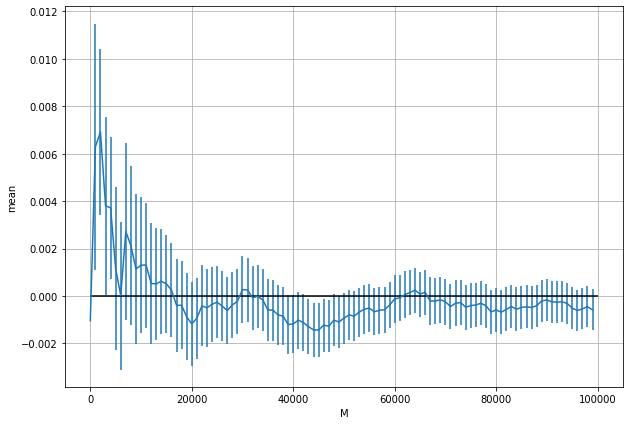

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x=np.loadtxt("x.dat")
ave, err =np.loadtxt("ex1.1.dat", unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,ave-0.5,yerr=err)
plt.hlines(0,0,100000)
plt.xlabel("M")
plt.ylabel("mean")
plt.grid(True)
plt.show()

### <span style="color:black"> Part 2 </span>

The second part aim to evaluate $\sigma^2 = \int_0^1 (r-1/2)^2 dr$ whose result is $ \frac{1}{12} $. The scheme is the same as part 1 with the only difference of the value of interest which is $ (r-1/2)^2$ where r is random generated in $[0,1)$. $M$ and $N$ are the same of the previous part. Again the picture of the estimation is visible below and show a perfect compatibility.

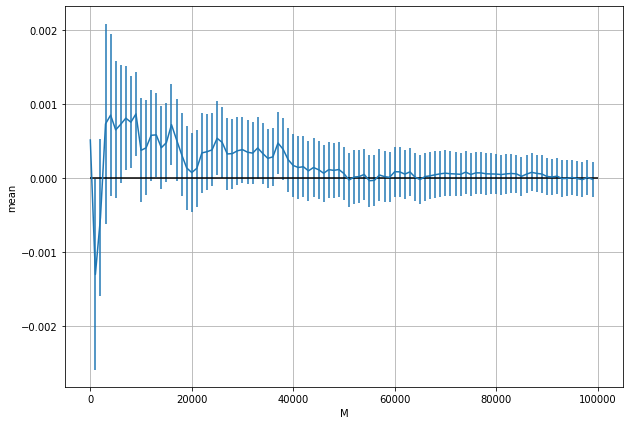

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x=np.loadtxt("x.dat")
ave, err =np.loadtxt("ex1.2.dat", unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,ave-1/12,yerr=err)
plt.hlines(0,0,100000)
plt.xlabel("M")
plt.ylabel("mean")
plt.grid(True)
plt.show()

### <span style="color:black"> Part 3 </span>

The third part target is implementing the $\chi^2$ test in order to verify the effective randomness of our generator. If the obtained value are around 100 than the generator is a good generator. The result show value around 100 but with some peak. This means that we cannot certainly exclude the non-randomness of the generator.

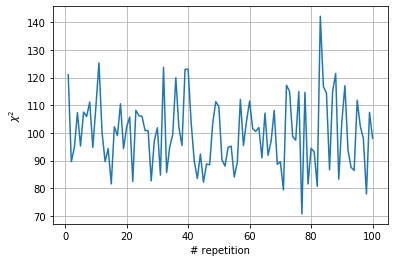

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

y=np.loadtxt("ex1.3.dat")
x=np.arange(100)
x+=1
plt.errorbar(x,y)
plt.xlabel("# repetition")
plt.ylabel("$\chi^2$")
plt.grid(True)
plt.show()

## <span style="color:black"> Exercise 01.2 </span>

The meaning of the second exercise lies in testing the Central Limit Theorem.
Befor doing this I had to add two method at the random generator: one for sampling exponential distribution and one for the cauchy-lorentz distribution. Both this method were achieved by the technique of the inversion of cumulative distribution. This technique gave the following recipe, with $y$ extracted from a $[0,1)$ uniform distrubution:

1.  $x=-1/\lambda \ln(1-y)$
2.  $x=\Gamma \tan(\pi(y-1/2))+\mu$

As parameter It was choosen $\lambda=1 , \mu=0 , \Gamma=1$.

Then for both this distribution plus the uniform one I've filled $4$ histograms with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$). I made $3$ pictures, one for distribution, visible below which contains $4$ histograms. I tested uniform and normal distribution, for $N=100$, with a normal fit and It's easy to seen how both match with normal distribution as it was expected because both of them satisfy the **CLT** hypothesis. Instead the lorentzian, which has non finite variance so it doesn't satisfy the hypothesis, converges to a lorentzian, again easy to see.

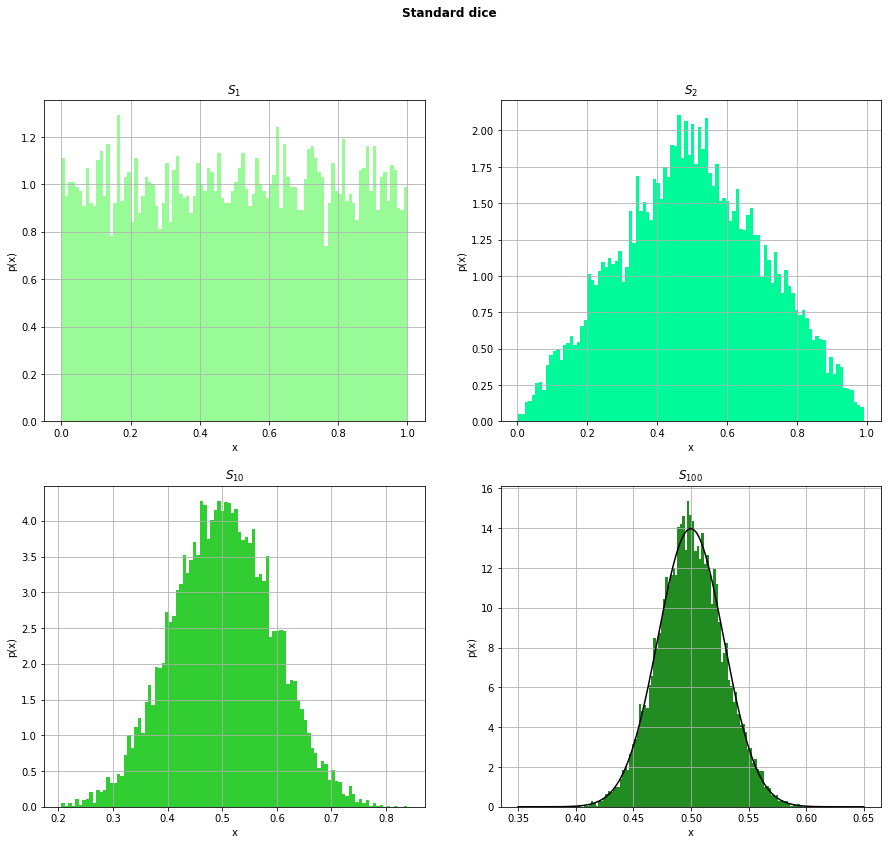

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 

s1=np.loadtxt("stand.dat",max_rows=10000)
s2=np.loadtxt("stand.dat",skiprows=10000,max_rows=10000)
s10=np.loadtxt("stand.dat",skiprows=20000,max_rows=10000)
s100=np.loadtxt("stand.dat",skiprows=30000,max_rows=10000)
fig=plt.figure(figsize=(15,13))
plt.suptitle("Standard dice", weight="bold")

#N=1
plt.subplot(221)
plt.hist(s1,100,color="palegreen",density=True)
plt.title("$S_1$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=2
plt.subplot(222)
plt.hist(s2,100,color="mediumspringgreen",density=True)
plt.title("$S_2$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=10
plt.subplot(223)
plt.hist(s10,100,color="limegreen",density=True)
plt.title("$S_{10}$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=100
plt.subplot(224)
plt.hist(s100,100,color="forestgreen",density=True)
plt.title("$S_{100}$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)


#fit Gaussiano
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(s100))
m, s = stats.norm.fit(s100)             # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s)    # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g)
plt.show() 

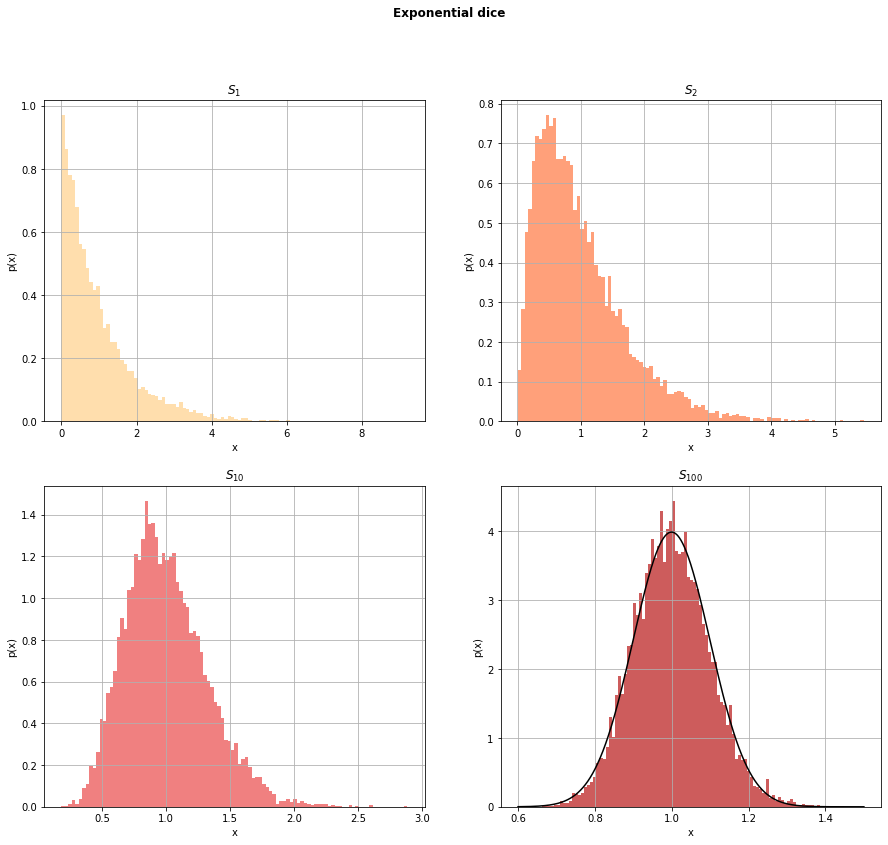

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

e1=np.loadtxt("exp.dat",max_rows=10000)
e2=np.loadtxt("exp.dat",skiprows=10000,max_rows=10000)
e10=np.loadtxt("exp.dat",skiprows=20000,max_rows=10000)
e100=np.loadtxt("exp.dat",skiprows=30000,max_rows=10000)
fig=plt.figure(figsize=(15,13))
plt.suptitle("Exponential dice", weight="bold")


#N=1
plt.subplot(221)
plt.hist(e1,100,color="navajowhite",density=True)
plt.title("$S_1$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=2
plt.subplot(222)
plt.hist(e2,100,color="lightsalmon",density=True)
plt.title("$S_2$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=10
plt.subplot(223)
plt.hist(e10,100,color="lightcoral",density=True)
plt.title("$S_{10}$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=100
plt.subplot(224)
plt.hist(e100,100,color="indianred",density=True)
plt.title("$S_{100}$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)


#fit Gaussiano
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(e100))
m, s = stats.norm.fit(e100) 
pdf_g = stats.norm.pdf(lnspc, m, s)    
plt.plot(lnspc, pdf_g , color="black")
plt.show() 


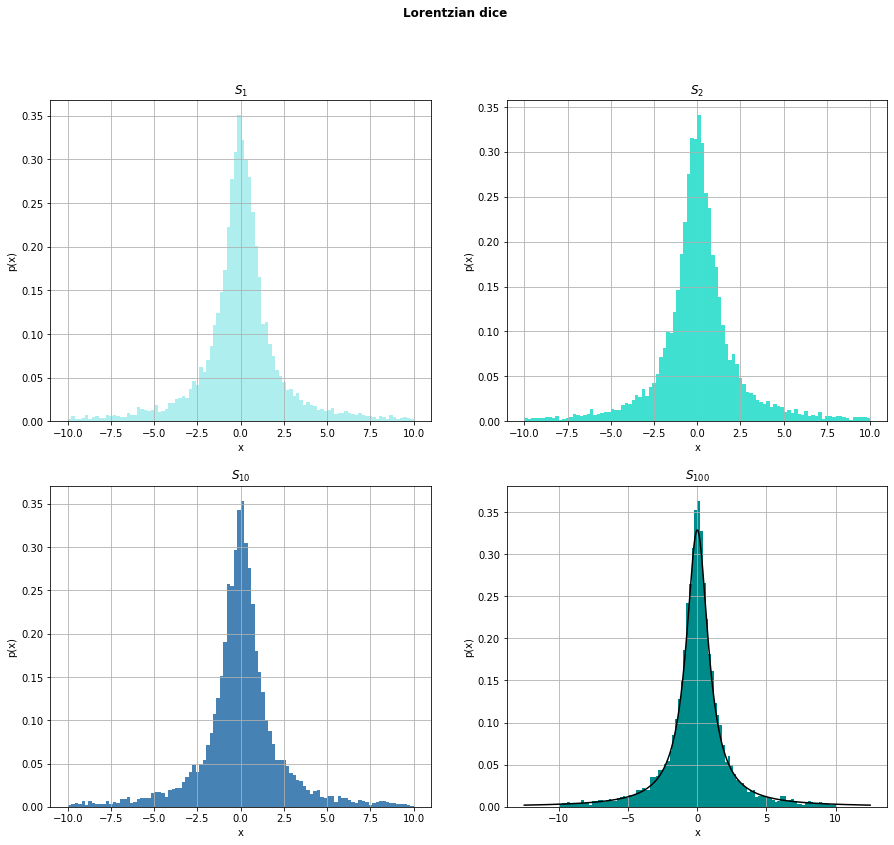

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

l1=np.loadtxt("lorentzian.dat",max_rows=10000)
l2=np.loadtxt("lorentzian.dat",skiprows=10000,max_rows=10000)
l10=np.loadtxt("lorentzian.dat",skiprows=20000,max_rows=10000)
l100=np.loadtxt("lorentzian.dat",skiprows=30000,max_rows=10000)
fig=plt.figure(figsize=(15,13))
plt.suptitle("Lorentzian dice", weight="bold")


#N=1
plt.subplot(221)
plt.hist(l1,100,range=(-10,10),color="paleturquoise",density=True)
plt.title("$S_1$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=2
plt.subplot(222)
plt.hist(l2,100,range=(-10,10),color="turquoise",density=True)
plt.title("$S_2$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=10
plt.subplot(223)
plt.hist(l10,100,range=(-10,10),color="steelblue",density=True)
plt.title("$S_{10}$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=100
plt.subplot(224)
plt.hist(l100,100,range=(-10,10),color="darkcyan",density=True)
plt.title("$S_{100}$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)


#fit Lorentiano
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(l100))
p, m = stats.cauchy.fit(l100) 
pdf_l = stats.cauchy.pdf(lnspc, p, m)
plt.plot(lnspc, pdf_l, color="black")
plt.show() 

## <span style="color:black"> Exercise 01.3 </span>

The last exercise is the simulation of the buffon experiment.
This experiment is structured as it follows:  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

### how to implement the algorithm?

Due to the periodicity of the experiment It is possible to restric the simulation at the space between two lines only and due to the simmetry we can choose the lines to be parralel to x or y axis and after the choiche ignoring the other one. The simulation was made again with blocking method, $N$ was taken equal to $100$ where $M$ to $10^5$. I used the following scheme for the making:

1.  Generate randomly a number in the range $[0,d]$, this number will be the center of the needle $y_0$
2.  Generate randomly an angle in the range $[0,2\pi]$, this angle will be the orientation of the needle $\theta^{(1)}$
3.  Evaluate the abscissas of the needle as $x=\frac{L}{2}\cos(\theta)$, because of the symmetry I take $\cos(\theta) \geq 0$
4.  If $x_0-x\leq0$ or $x_0+x\geq d$ the needle has hit a lines
5.  After $M/N$ throws evaluate $\pi$ with the previous formula and its uncertainty as standard deviation.
6.  Repeat $N$ times the previous four steps.

The result are plotted below as $x-\pi$ where x is the simulation's result and as it can be seen I have achieved a good compatibility with the known digit of $\pi$



<font size="2">$(1)$ The angle was randomly generated without using $\pi$. In fact I had generated two random number, x and y, on the unit circonference and then I evaluated the angle as $\theta=\arctan(y /x)$. it's not a problem that it's defined in $[-\pi/2,\pi/2]$ again due to the symmetry.  </font>

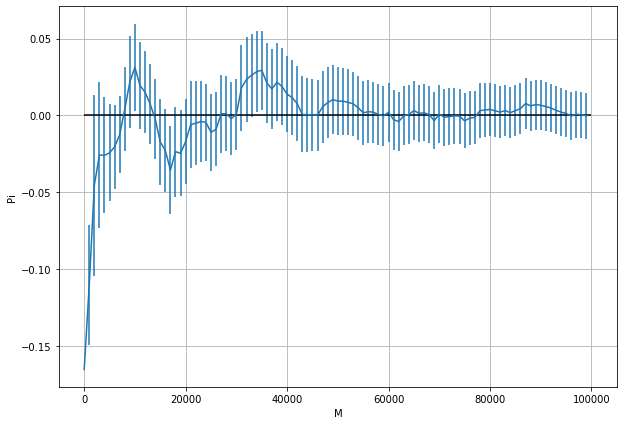

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x=np.loadtxt("x.dat")
ave, err =np.loadtxt("pi.dat", unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,ave-3.14159,yerr=err)
plt.hlines(0,0,100000)
plt.xlabel("M")
plt.ylabel("Pi")
plt.grid(True)
plt.show()